# **IMPORTING NECESSARY LIBRARIES**
File and directory operation <br>
Randomizing data<br>
Displaying progress bar<br>
Numerical opeation<br>
Plottin<br>
Image processing<br>

In [1]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from PIL import Image
import math

# **MOUNTING THE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **SETTING THE PATH**

In [3]:
dataset_path = '/content/drive/MyDrive/CVPR ASSIGNMENT/DATASET/Animals'

### **DEFINING TRAINING DIRECTORY**
shows all the classes in the directory




In [4]:
TRAIN_DIR = dataset_path
CLASSES = []
for c in os.listdir(TRAIN_DIR):
    CLASSES.append(c)
print(CLASSES)

['Tiger', 'Cheetah', 'Leopard', 'Jaguar', 'Lion']


## LABELING THE CLASSES
declaring a list where it will store the class name alongside the class label

In [5]:
TRAIN_DATA = []
for c in CLASSES:
    path = os.path.join(TRAIN_DIR, c)
    class_num = CLASSES.index(c)
    print(f'"{c}" → {class_num}')

    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path, img))
        img_arr = cv.resize(img_arr, (64, 64), interpolation=cv.INTER_AREA)

        TRAIN_DATA.append([img_arr, class_num])




"Tiger" → 0


100%|██████████| 39/39 [00:31<00:00,  1.24it/s]


"Cheetah" → 1


100%|██████████| 38/38 [00:31<00:00,  1.20it/s]


"Leopard" → 2


100%|██████████| 31/31 [00:22<00:00,  1.38it/s]


"Jaguar" → 3


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


"Lion" → 4


100%|██████████| 32/32 [00:20<00:00,  1.52it/s]


Text(0.5, 0, 'Tiger')

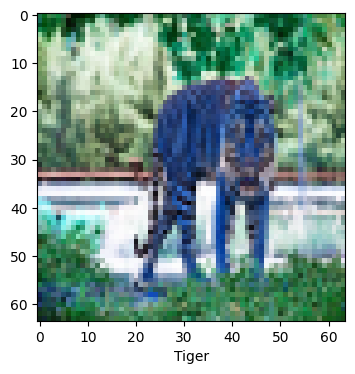

In [6]:
image = TRAIN_DATA[0][0]
plt.figure(figsize=(10,4))
plt.imshow(image)
plt.xlabel(CLASSES[TRAIN_DATA[0][1]])

# SHUFFLLING AND DISPLAYING
After suffling 50 images are displayed with a A grid layout with 5 rows and 10 columns. I have also converted the image into grey scale image.

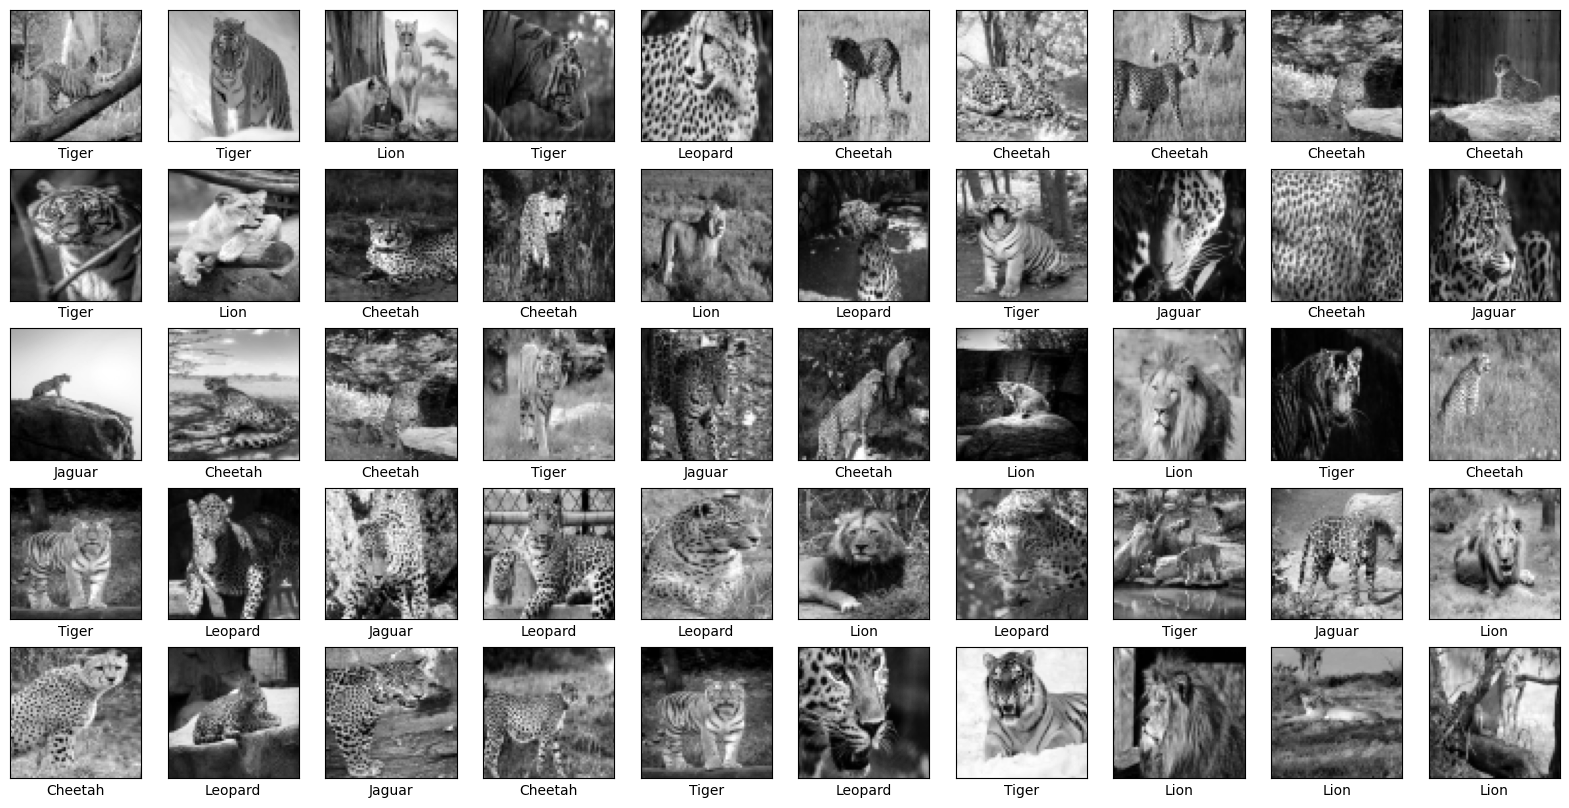

In [7]:
random.shuffle(TRAIN_DATA)
image = TRAIN_DATA[0][0]

plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5, 10, i+1)
    image = TRAIN_DATA[i][0]
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(image_gray, cmap="gray")
    plt.xlabel(CLASSES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    plt.axis()
    if i == 50:
        break
plt.show()

In [8]:
print(f"Total number of images loaded: {len(TRAIN_DATA)}")

Total number of images loaded: 170


# CROSS FOLDING
Folding the total images into 5 segments.

In [9]:
total_folds = 5
fold_size = len(TRAIN_DATA) // total_folds

folds = []
for i in range(total_folds):
    start_idx = i * fold_size
    end_idx = start_idx + fold_size
    fold = TRAIN_DATA[start_idx:end_idx]
    folds.append(fold)
    print(f"Fold {i+1} consist of {len(fold)} images.")


Fold 1 consist of 34 images.
Fold 2 consist of 34 images.
Fold 3 consist of 34 images.
Fold 4 consist of 34 images.
Fold 5 consist of 34 images.


# DEFINING A FUNCTION FOR CALCULATING L2 DISTANCE AND KNN PREDICTION

In [10]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))

from collections import Counter

def knn_predict(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    return Counter(labels).most_common(1)[0][0]

# CALCULATING THE VALUES AND SHOWING THE RESULTS

when K is : 1 The Average Accuracy is : 0.31
when K is : 2 The Average Accuracy is : 0.31
when K is : 3 The Average Accuracy is : 0.29
when K is : 4 The Average Accuracy is : 0.31
when K is : 5 The Average Accuracy is : 0.27
when K is : 6 The Average Accuracy is : 0.28
when K is : 7 The Average Accuracy is : 0.26
when K is : 8 The Average Accuracy is : 0.29
when K is : 9 The Average Accuracy is : 0.28
when K is : 10 The Average Accuracy is : 0.31
when K is : 11 The Average Accuracy is : 0.29
when K is : 12 The Average Accuracy is : 0.25
when K is : 13 The Average Accuracy is : 0.26
when K is : 14 The Average Accuracy is : 0.26
when K is : 15 The Average Accuracy is : 0.29
when K is : 16 The Average Accuracy is : 0.26
when K is : 17 The Average Accuracy is : 0.28
when K is : 18 The Average Accuracy is : 0.28
when K is : 19 The Average Accuracy is : 0.30
when K is : 20 The Average Accuracy is : 0.28
when K is : 21 The Average Accuracy is : 0.27
when K is : 22 The Average Accuracy is : 0.

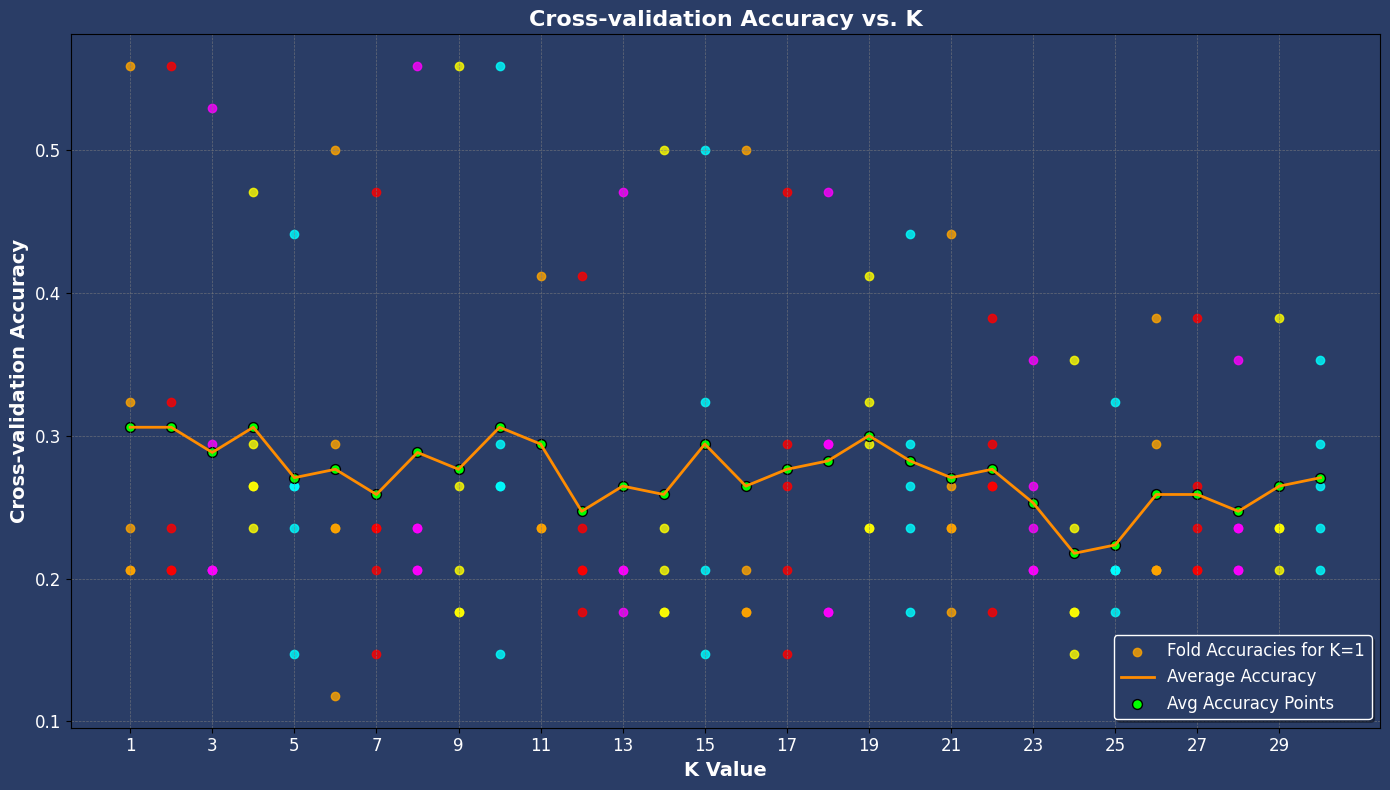

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fold_accuracies = []
avg_accuracies = []

for k in range(1, 31):
    accuracies = []
    for i in range(len(folds)):
        valid_set = folds[i]
        train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

        predictions = []
        for valid_img in valid_set:
            distances = [(l2_distance(valid_img[0], train_img[0]), train_img[1]) for train_img in train_set]
            distances.sort()
            predicted_label = knn_predict(distances, k)
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    fold_accuracies.append(accuracies)
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies.append(avg_accuracy)
    print(f"when K is : {k} The Average Accuracy is : {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies}")

# Plotting the accuracies
plt.figure(figsize=(14, 8))

# Set deep blue background color
plt.gcf().set_facecolor('#2A3D66')
plt.gca().set_facecolor('#2A3D66')

# Color palette for fold accuracies
colors = ['orange', 'red', 'magenta', 'yellow', 'cyan']

for k, fold_accuracy in enumerate(fold_accuracies):
    plt.scatter(
        [k + 1] * len(fold_accuracy),  # x-axis points for fold k
        fold_accuracy,  # y-axis fold accuracies
        color=colors[k % len(colors)], alpha=0.8, label=f'Fold Accuracies for K={k + 1}' if k == 0 else None
    )

# Plot average accuracies
plt.plot(
    range(1, 31), avg_accuracies,
    color='darkorange', linewidth=2, label='Average Accuracy'
)
plt.scatter(
    range(1, 31), avg_accuracies,
    color='lime', s=50, edgecolors='black', label='Avg Accuracy Points'  # Highlighted in lime for contrast
)

# Customizing plot appearance
plt.xlabel('K Value', fontsize=14, weight='bold', color='white')
plt.ylabel('Cross-validation Accuracy', fontsize=14, weight='bold', color='white')
plt.title('Cross-validation Accuracy vs. K', fontsize=16, weight='bold', color='white')
plt.xticks(range(1, 31, 2), fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Legend with adjusted appearance
plt.legend(loc='lower right', frameon=True, shadow=True, facecolor='#2A3D66', edgecolor='white', fontsize=12, labelcolor='white')

plt.tight_layout()
plt.show()
